In [20]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [21]:
# read
n_LF, n_HF, rel_error = np.loadtxt('error_function_goku_narrow_pre_frontera.txt', unpack=True, usecols=(0,1,2))

In [22]:
error_mean = rel_error.mean()
error_var = np.var(rel_error)

In [23]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    eta = pm.Normal("eta", mu=1, sigma=1)
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = pm.LogNormal("rho", mu=1, sigma=1)
    beta_L = pm.Normal("beta_L", mu=1, sigma=.3)
    beta_H = pm.Normal("beta_H", mu=3, sigma=1)
    # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
    beta_H2 = pm.Normal("beta_H2", mu=3, sigma=1)
    # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
    alpha_L = pm.Normal("alpha_L", mu=10, sigma=3)
    alpha_1 = pm.Normal("alpha_1", mu=10, sigma=3)
    alpha_2 = pm.Normal("alpha_2", mu=1, sigma=3)
    # rho_H = pm.Normal("rho_H", mu=1, sigma=.2)

    sigma = pm.HalfNormal("sigma", sigma=.1)

    # Expected value of outcome
    mu = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))

    # Likelihood (sampling distribution) of observations
    rel_error_obs = pm.Normal("rel_error_obs", mu=mu, sigma=sigma, observed=np.log10(rel_error))

In [24]:
error_mean

0.025443098454545454

In [25]:
with basic_model:
    # draw 2000 posterior samples
    # idata = pm.sample(2000, tune=1000)
    idata = pm.sample(3000, tune=2000, chains=4) # chains=6 would still use 4 cores

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eta, rho, beta_L, beta_H, beta_H2, alpha_L, alpha_1, alpha_2, sigma]


Output()

Sampling 4 chains for 2_000 tune and 3_000 draw iterations (8_000 + 12_000 draws total) took 514 seconds.


In [26]:
dict(idata)

{'posterior': <xarray.Dataset> Size: 888kB
 Dimensions:  (chain: 4, draw: 3000)
 Coordinates:
   * chain    (chain) int64 32B 0 1 2 3
   * draw     (draw) int64 24kB 0 1 2 3 4 5 6 ... 2994 2995 2996 2997 2998 2999
 Data variables:
     alpha_1  (chain, draw) float64 96kB 8.207 14.06 14.75 ... 11.33 12.9 14.4
     alpha_2  (chain, draw) float64 96kB -2.5 -2.528 -2.571 ... -2.696 -2.73
     alpha_L  (chain, draw) float64 96kB 22.29 21.01 20.26 ... 22.53 23.5 19.04
     beta_H   (chain, draw) float64 96kB 1.126 1.091 1.149 ... 1.178 1.191 1.131
     beta_H2  (chain, draw) float64 96kB 0.2134 0.2244 0.2167 ... 0.182 0.1843
     beta_L   (chain, draw) float64 96kB 1.502 1.46 1.475 ... 1.478 1.476 1.474
     eta      (chain, draw) float64 96kB 0.01723 0.01741 ... 0.01589 0.01612
     rho      (chain, draw) float64 96kB 894.1 682.3 881.9 ... 1.104e+03 855.8
     sigma    (chain, draw) float64 96kB 0.07711 0.07694 ... 0.07695 0.07668
 Attributes:
     created_at:                 2024-08-30T18:

In [27]:
idata.posterior.data_vars

Data variables:
    alpha_1  (chain, draw) float64 96kB 8.207 14.06 14.75 ... 11.33 12.9 14.4
    alpha_2  (chain, draw) float64 96kB -2.5 -2.528 -2.571 ... -2.696 -2.73
    alpha_L  (chain, draw) float64 96kB 22.29 21.01 20.26 ... 22.53 23.5 19.04
    beta_H   (chain, draw) float64 96kB 1.126 1.091 1.149 ... 1.178 1.191 1.131
    beta_H2  (chain, draw) float64 96kB 0.2134 0.2244 0.2167 ... 0.182 0.1843
    beta_L   (chain, draw) float64 96kB 1.502 1.46 1.475 ... 1.478 1.476 1.474
    eta      (chain, draw) float64 96kB 0.01723 0.01741 ... 0.01589 0.01612
    rho      (chain, draw) float64 96kB 894.1 682.3 881.9 ... 1.104e+03 855.8
    sigma    (chain, draw) float64 96kB 0.07711 0.07694 ... 0.07695 0.07668

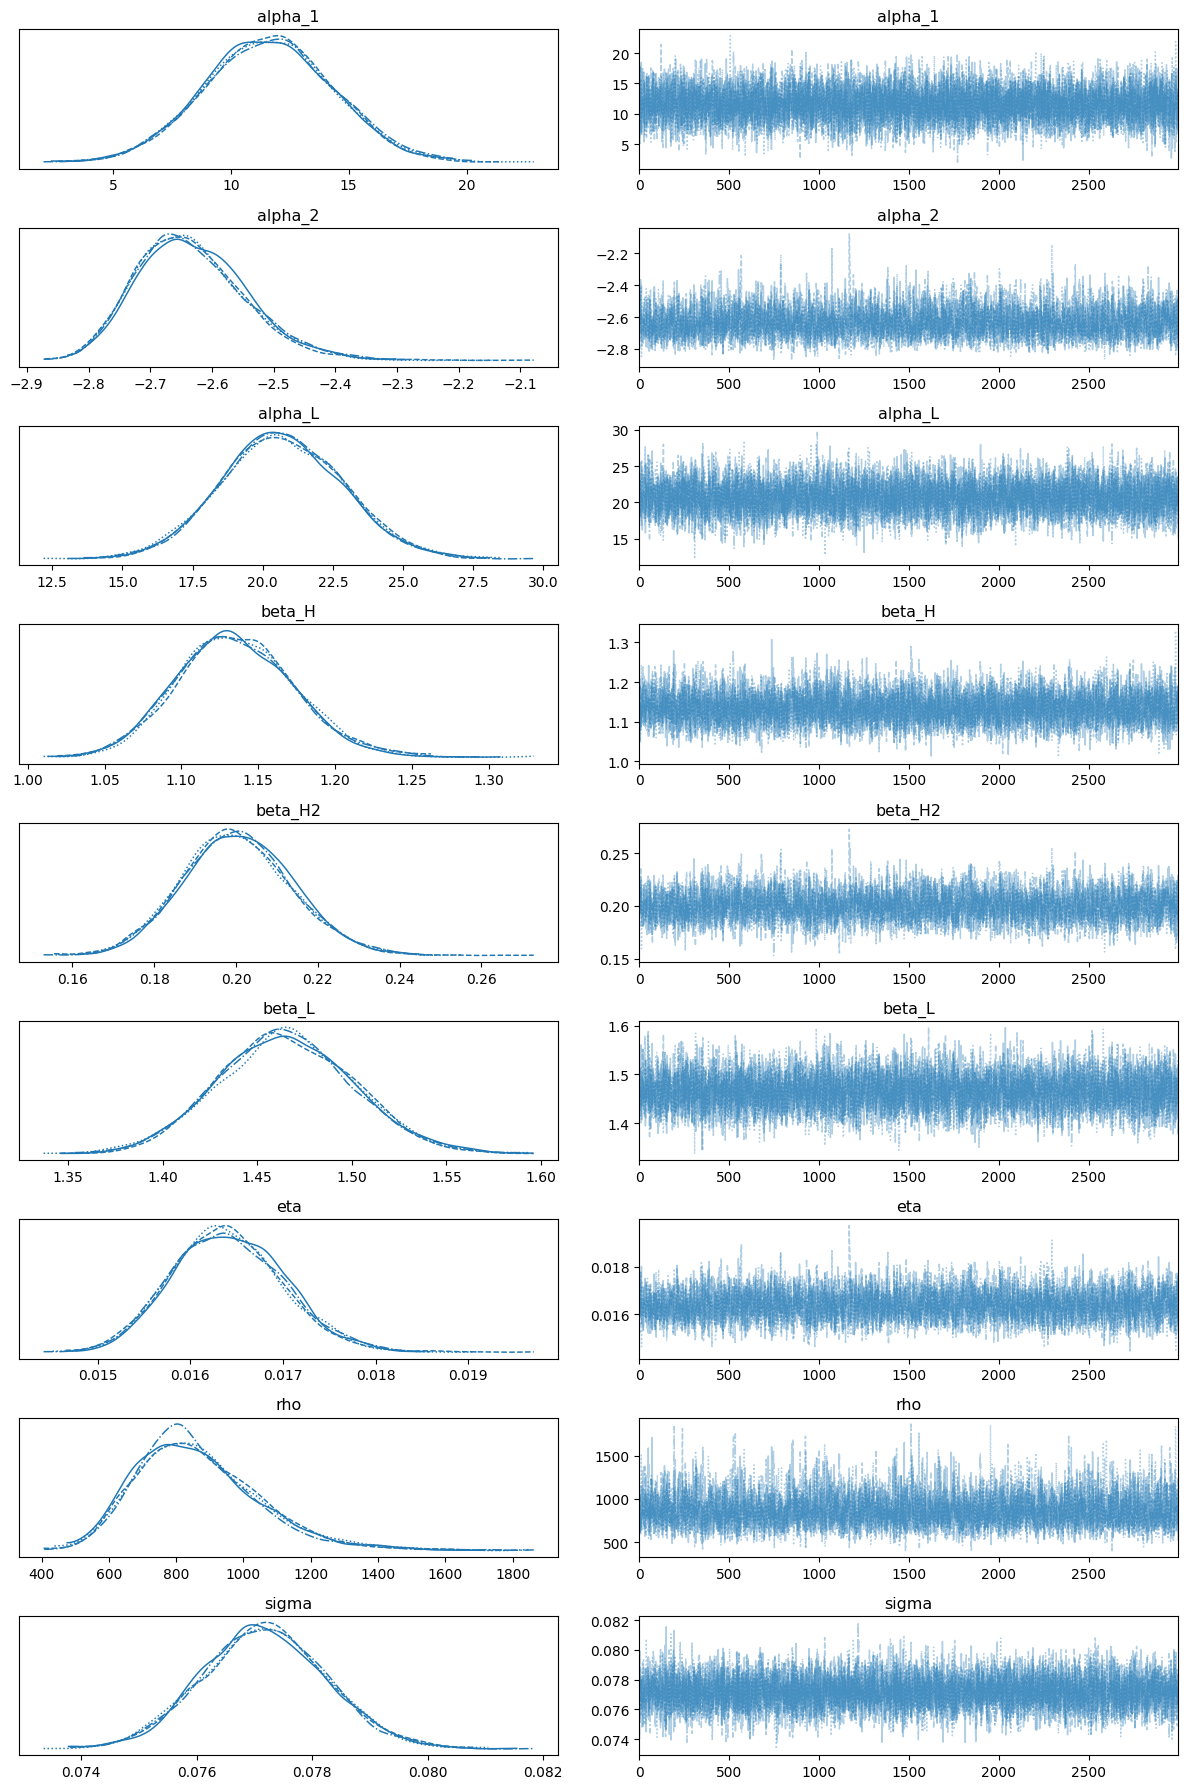

In [28]:
az.plot_trace(idata)
plt.tight_layout()

In [54]:
posterior_eta = idata["posterior"]["eta"]
credible_interval_eta = np.percentile(posterior_eta, [16, 50, 84])
posterior_rho = idata["posterior"]["rho"]
credible_interval_rho = np.percentile(posterior_rho, [16, 50, 84])
posterior_beta_L = idata["posterior"]["beta_L"]
credible_interval_beta_L = np.percentile(posterior_beta_L, [16, 50, 84])
posterior_beta_H = idata["posterior"]["beta_H"]
credible_interval_beta_H = np.percentile(posterior_beta_H, [16, 50, 84])
posterior_beta_H2 = idata["posterior"]["beta_H2"]
credible_interval_beta_H2 = np.percentile(posterior_beta_H2, [16, 50, 84])
posterior_alpha_L = idata["posterior"]["alpha_L"]
credible_interval_alpha_L = np.percentile(posterior_alpha_L, [16, 50, 84])
posterior_alpha_1 = idata["posterior"]["alpha_1"]
credible_interval_alpha_1 = np.percentile(posterior_alpha_1, [16, 50, 84])
posterior_alpha_2 = idata["posterior"]["alpha_2"]
credible_interval_alpha_2 = np.percentile(posterior_alpha_2, [16, 50, 84])
posterior_sigma = idata["posterior"]["sigma"]
credible_interval_sigma = np.percentile(posterior_sigma, [16, 50, 84])

print('eta',credible_interval_eta)
print('rho',credible_interval_rho)
print('beta_L',credible_interval_beta_L)
print('beta_H',credible_interval_beta_H)
print('beta_H2',credible_interval_beta_H2)
print('alpha_L',credible_interval_alpha_L)
print('alpha_1',credible_interval_alpha_1)
print('alpha_2',credible_interval_alpha_2)
print('sigma',credible_interval_sigma)




eta [0.01581363 0.01638284 0.01700016]
rho [ 688.40892094  840.51783809 1041.18830009]
beta_L [1.42992819 1.46443914 1.5007815 ]
beta_H [1.09794715 1.13385676 1.1727734 ]
beta_H2 [0.18721798 0.19995312 0.21358565]
alpha_L [18.55767399 20.64151615 22.84871557]
alpha_1 [ 8.92935862 11.60948562 14.32816847]
alpha_2 [-2.72001305 -2.64125169 -2.54612901]
sigma [0.0761005  0.07716418 0.07823903]


In [30]:
az.summary(idata, round_to=3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_1,11.617,2.701,6.550,16.657,0.030,0.022,8174.342,7798.893,1.001
alpha_2,-2.633,0.089,-2.793,-2.468,0.001,0.001,4041.581,5632.924,1.001
alpha_L,20.691,2.167,16.633,24.770,0.026,0.019,6791.541,7919.544,1.000
beta_H,1.135,0.038,1.064,1.206,0.001,0.000,5599.978,5815.006,1.001
beta_H2,0.200,0.013,0.175,0.226,0.000,0.000,3857.997,5427.670,1.001
beta_L,1.465,0.036,1.398,1.531,0.000,0.000,6210.692,7534.669,1.000
eta,0.016,0.001,0.015,0.018,0.000,0.000,4148.983,5481.940,1.001
rho,865.282,186.231,544.846,1211.480,2.826,2.023,4489.682,5506.621,1.001
sigma,0.077,0.001,0.075,0.079,0.000,0.000,7306.353,6993.077,1.000


In [57]:
az.summary(idata, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_1,11.61713,2.70110,6.55035,16.65667,0.02990,0.02151,8174.34181,7798.89270,1.00110
alpha_2,-2.63287,0.08911,-2.79274,-2.46752,0.00143,0.00101,4041.58130,5632.92399,1.00093
alpha_L,20.69131,2.16673,16.63335,24.76951,0.02629,0.01859,6791.54092,7919.54404,1.00007
beta_H,1.13537,0.03805,1.06359,1.20561,0.00051,0.00036,5599.97761,5815.00640,1.00052
beta_H2,0.20037,0.01342,0.17549,0.22583,0.00022,0.00015,3857.99683,5427.66980,1.00057
beta_L,1.46528,0.03571,1.39770,1.53133,0.00045,0.00032,6210.69172,7534.66866,1.00010
eta,0.01641,0.00060,0.01532,0.01754,0.00001,0.00001,4148.98252,5481.93952,1.00081
rho,865.28158,186.23139,544.84577,1211.48030,2.82582,2.02307,4489.68230,5506.62070,1.00080
sigma,0.07718,0.00107,0.07513,0.07916,0.00001,0.00001,7306.35318,6993.07719,1.00026


In [31]:
posterior_eta.values.flatten()

array([0.01722566, 0.017409  , 0.01717364, ..., 0.01586569, 0.01588833,
       0.01611668])

In [32]:
# Alternative method to find mode using histogram
def get_histogram_mode(data, bins=500):
    hist, bin_edges = np.histogram(data, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    mode = bin_centers[np.argmax(hist)]
    return mode

# Extracting modes using histogram method for comparison
hist_modes = {}
for var in idata.posterior.data_vars:
    samples = idata.posterior[var].values.flatten()
    mode = get_histogram_mode(samples)
    hist_modes[var] = mode

print("Histogram modes of each posterior:")
for var, mode in hist_modes.items():
    print(f"{var}: {mode}")

Histogram modes of each posterior:
alpha_1: 12.181307895948905
alpha_2: -2.632255069321793
alpha_L: 20.870078289678574
beta_H: 1.119656615382879
beta_H2: 0.20076361701518797
beta_L: 1.474708412341252
eta: 0.01640049807357686
rho: 832.1061103795275
sigma: 0.07690468358374422


In [33]:
from scipy.stats import gaussian_kde

# Assuming `idata` is your InferenceData object with posterior samples
posterior_samples = idata.posterior

# Function to compute the mode using KDE
def get_mode_kde(data):
    kde = gaussian_kde(data)
    x_grid = np.linspace(min(data), max(data), 1000)
    mode = x_grid[np.argmax(kde(x_grid))]
    return mode

# Extracting modes for each parameter using KDE
kde_modes = {}
for var in idata.posterior.data_vars:
    samples = idata.posterior[var].values.flatten()
    mode = get_mode_kde(samples)
    kde_modes[var] = mode

print("KDE modes of each posterior:")
for var, mode in kde_modes.items():
    print(f"{var}: {mode}")


KDE modes of each posterior:
alpha_1: 12.10805994959943
alpha_2: -2.6543212783390944
alpha_L: 20.370936566039855
beta_H: 1.1271296181345987
beta_H2: 0.19900878482262696
beta_L: 1.4621138861594511
eta: 0.01635475778516624
rho: 804.7680929163678
sigma: 0.07716361409291148


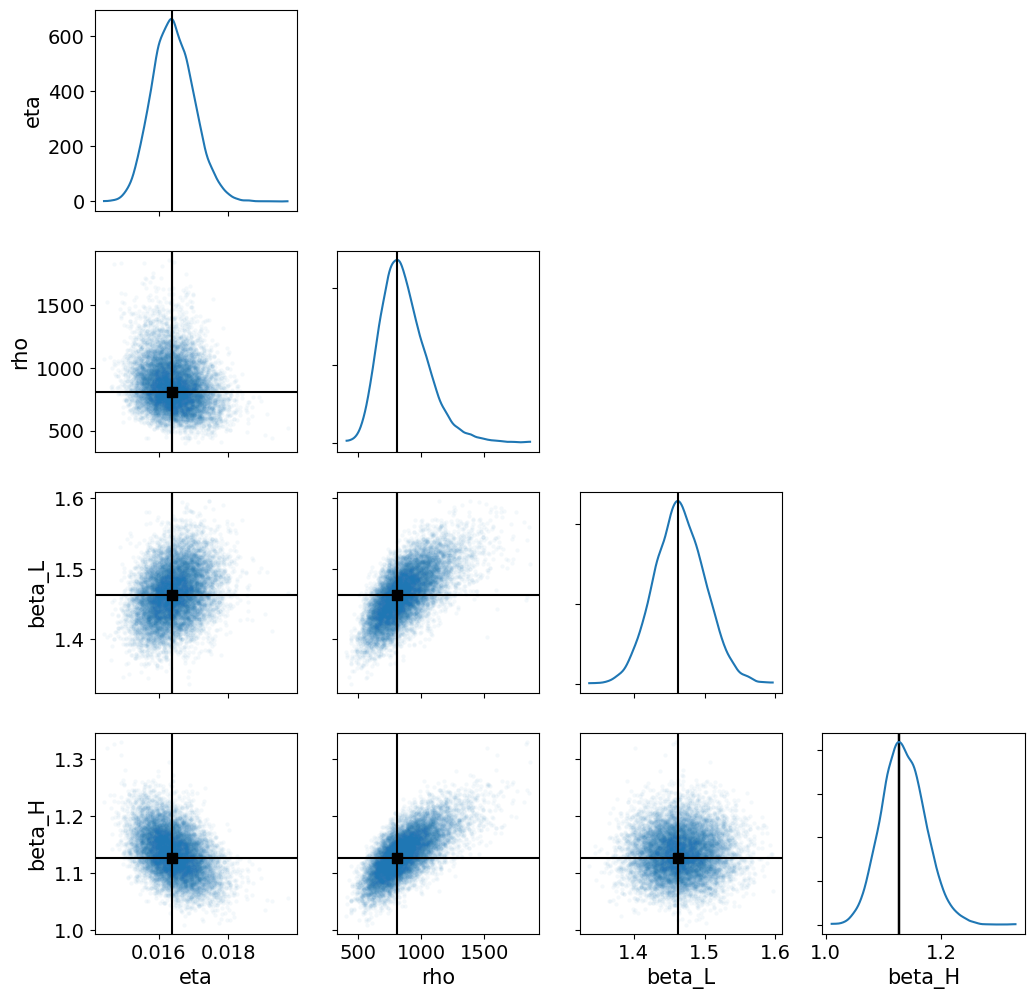

In [34]:
az.plot_pair(
    idata,
    marginals=True,
    point_estimate="mode",
    figsize=(12, 12),
    scatter_kwargs={"alpha": 0.05},
    var_names=["eta", "rho", "beta_L", "beta_H"],
);

In [35]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import gaussian_kde
import arviz as az  # Assume idata is an ArviZ InferenceData object

# Assume `idata` is your InferenceData object with posterior samples
posterior_samples = idata.posterior

# Define a function to evaluate the joint density using KDE
def joint_kde_density(point, samples):
    kde = gaussian_kde(samples.T)  # Transpose for proper shape
    return -kde(point)  # Negative because we are minimizing

# Extract the samples of all four parameters of interest
param_names = ['rho', 'eta', 'beta_L', 'beta_H', 'beta_H2', 'alpha_L', 'alpha_1', 'alpha_2', 'sigma']  # Replace with actual parameter names
sample_arrays = [posterior_samples[param].values.flatten() for param in param_names]

# Combine samples into a 2D array for joint distribution
joint_samples = np.vstack(sample_arrays).T

# Initial guess for the optimizer (mean of samples can be a good starting point)
initial_guess = np.mean(joint_samples, axis=0)

# Perform the optimization to find the mode
result = minimize(joint_kde_density, initial_guess, args=(joint_samples,), method='L-BFGS-B')

# The result contains the mode of the joint distribution
global_mode = result.x

# Print the global mode of the joint distribution
print(f"Global mode of the joint distribution ({', '.join(param_names)}): {global_mode}")

Global mode of the joint distribution (rho, eta, beta_L, beta_H, beta_H2, alpha_L, alpha_1, alpha_2, sigma): [ 8.65281578e+02  1.62843649e-02  1.46743745e+00  1.13711515e+00
  1.97072336e-01  2.06906956e+01  1.16169405e+01 -2.66444760e+00
  7.68996799e-02]


In [39]:
# define the error function 2 param modes
def error_function(n_LF, n_HF):  # global mode
    eta = 1.62843649e-02
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = 804.7680929163678
    beta_L = 1.46743745e+00
    beta_H = 1.13711515e+00
    # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
    beta_H2 = 1.97072336e-01
    # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
    alpha_L = 2.06906956e+01 
    alpha_1 = 1.16169405e+01
    alpha_2 = -2.66444760e+00

    sigma_lg_Phi = 7.68996799e-02   # standard deviation of the log of the error function
    # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
    lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))
    
    mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
    mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
    median_Phi = 10**lg_Phi
    return median_Phi

In [40]:
# loss  mean
lg_phi = np.log10(error_function(n_LF, n_HF))
loss = np.mean((lg_phi - np.log(rel_error))**2)

In [41]:
loss

5.085772623776276

In [42]:
# define the error function 2 param modes
def error_function(n_LF, n_HF):  # KDE modes
    eta = 0.01635475778516624
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = 8.65281578e+02
    beta_L = 1.4621138861594511
    beta_H = 1.1271296181345987
    # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
    beta_H2 = 0.19900878482262696
    # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
    alpha_L = 20.370936566039855
    alpha_1 = 12.10805994959943
    alpha_2 = -2.6543212783390944

    sigma_lg_Phi = 0.07716361409291148   # standard deviation of the log of the error function
    # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
    lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))
    
    mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
    mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
    median_Phi = 10**lg_Phi
    return median_Phi

In [43]:
# loss  mean
lg_phi = np.log10(error_function(n_LF, n_HF))
loss = np.mean((lg_phi - np.log(rel_error))**2)
print(loss)

5.128970967814662


In [58]:
# define the error function 2 param modes
def error_function(n_LF, n_HF):  # mean
    eta = 0.01641
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = 865.28158
    beta_L = 1.46528
    beta_H = 1.13537
    # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
    beta_H2 = 0.20037
    # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
    alpha_L = 20.69131
    alpha_1 = 11.61713
    alpha_2 = -2.63287

    sigma_lg_Phi = 0.07718		 # standard deviation of the log of the error function
    # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
    lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))
    
    mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
    mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
    median_Phi = 10**lg_Phi
    return median_Phi

In [59]:
# loss  mean
lg_phi = np.log10(error_function(n_LF, n_HF))
loss = np.mean((lg_phi - np.log(rel_error))**2)
print(loss)

5.1002954368335125


In [55]:
# define the error function 2 param modes
def error_function(n_LF, n_HF):  # median
    eta =0.01638284
    '''rho = pm.Uniform("rho", lower=0, upper=10)
    beta_L = pm.Uniform("beta_L", lower=0, upper=3)
    beta_H = pm.Uniform("beta_H", lower=0, upper=6)'''
    rho = 840.51783809
    beta_L = 1.46443914 
    beta_H = 1.13385676	
    # rho_2 = pm.Uniform("rho_2", lower=0, upper=1)
    beta_H2 = 0.19995312 
    # alpha_1 = pm.Normal("alpha_1", mu=10, sigma=5)
    alpha_L = 20.64151615 
    alpha_1 = 11.60948562
    alpha_2 = -2.64125169

    sigma_lg_Phi =0.07716418	 # standard deviation of the log of the error function
    # return 10**(np.log10(eta) + np.log10((rho / (n_LF**(beta_L) * n_HF**(beta_H)) + (1 - rho) / (alpha + n_HF**(beta_H2)))))
    lg_Phi = np.log10(eta) + np.log10(rho / ( (n_LF + n_HF) * (n_LF + alpha_L)**(beta_L-1) * (n_HF + alpha_1)**(beta_H-1) ) + 1 / (alpha_2 + n_HF)**(beta_H2))
    
    mode_Phi = 10**lg_Phi * np.exp(-sigma_lg_Phi**2 * (np.log(10))**2)
    mean_Phi = 10**lg_Phi * np.exp(1/2 * (sigma_lg_Phi * np.log(10))**2)
    median_Phi = 10**lg_Phi
    return median_Phi

In [56]:
# loss  mean
lg_phi = np.log10(error_function(n_LF, n_HF))
loss = np.mean((lg_phi - np.log(rel_error))**2)
print(loss)

5.08496907103558
